In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import downscale_local_mean
from os.path import join
from tqdm import tqdm_notebook
import cv2
from sklearn.model_selection import train_test_split

# Set up directory 
input_folder = join('/Users/khadekirti/Desktop/Deep Learning/Image Masking/')


In [55]:
# Read the train_mask files
df_mask = pd.read_csv(join(input_folder, 'train_masks.csv'), usecols=['img'])
# Image mask
ids_train = df_mask['img'].map(lambda s: s.split('_')[0]).unique()
#Image position (front image,back image e.t.c)
ids_train_position = df_mask['img'].map(lambda s: s.split('_')[1]).unique()
# Get image ID 
imgs_idx = list(range(1, 17))

In [74]:
df_mask.shape

(5088, 1)

In [50]:
# display head 
df_mask.head()

,img
0,00087a6bd4dc_01.jpg
1,00087a6bd4dc_02.jpg
2,00087a6bd4dc_03.jpg
3,00087a6bd4dc_04.jpg
4,00087a6bd4dc_05.jpg


In [79]:
# display IDs
ids_train
ids_train.tolist()
ids_train_drop_duplicates = list(dict.fromkeys(ids_train))
print(len(ids_train_drop_duplicates))
print(ids_train_drop_duplicates)

318
['00087a6bd4dc', '02159e548029', '03a857ce842d', '0495dcf27283', '04bd942b463b', '0789bed99cb8', '0795e132d090', '08a646be6b30', '0cdf5b5d0ce1', '0ce66b539f52', '0d1a9caf4350', '0d3adbbc9a8b', '0d53224da2b7', '0de66245f268', '0ed6904e1004', '0ee135a3cccc', '0eeaf1ff136d', '11acc40dc0ea', '11f3dc041cfb', '11fcda0a9e1c', '120c1dc7b116', '1258cf954183', '125cadcb9feb', '1390696b70b6', '13cad6eeabe8', '151c7f2d4183', '154ee2b6d27a', '169f5f6d8c9d', '16f0ec26d608', '189a2a32a615', '1952e5f91de0', '1a17a1bd648b', '1aba91a601c6', '1adaeb44f109', '1ae8a68a40e4', '1b25ea8ba94d', '1ba84b81628e', '1c5748340af8', '1e6f48393e17', '1e89e1af42e7', '21a7e6726ee3', '2267f4aa0d2c', '2335eef27de6', '23c088f6ec27', '245f9c9eab8a', '26ccab021981', '28109f18d9d4', '28d7fb5ba432', '28d9a149cb02', '292f59c6a347', '293a0fa72e5b', '2990f858e939', '2a4a8964ebf3', '2af7c265531e', '2c57132da7a0', '2cb06c1f5bb1', '2cb91c2543fa', '2ea62c1beee7', '2f39abb12388', '2faf504842df', '304437bad7ff', '3071362591f7', '31

In [56]:
# display position 
ids_train_position[1:10]

array(['02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg',
       '08.jpg', '09.jpg', '10.jpg'], dtype=object)

In [58]:
# Load img
load_img = lambda im, idx: imread(join(input_folder, 'train', '{}_{:02d}.jpg'.format(im, idx)))
# Load mask 
load_mask = lambda im, idx: imread(join(input_folder, 'train_masks', '{}_{:02d}_mask.gif'.format(im, idx)))
# Re-size to match mask 
resize = lambda im: downscale_local_mean(im, (4,4) if im.ndim==2 else (4,4,1))
# Mask image 
mask_image = lambda im, mask: (im * np.expand_dims(mask, 2))

In [59]:
num_train = 32  # len(ids_train)

# Load data for position id=1
X = np.empty((num_train, 320, 480, 12), dtype=np.float32)
y = np.empty((num_train, 320, 480, 1), dtype=np.float32)

with tqdm_notebook(total=num_train) as bar:
    idx = 1 # Rotation index
    for i, img_id in enumerate(ids_train[:num_train]):
        imgs_id = [resize(load_img(img_id, j)) for j in imgs_idx]
        # Input is image + mean image per channel + std image per channel
        X[i, ..., :9] = np.concatenate([imgs_id[idx-1], np.mean(imgs_id, axis=0), np.std(imgs_id, axis=0)], axis=2)
        y[i] = resize(np.expand_dims(load_mask(img_id, idx), 2)) / 255.
        del imgs_id # Free memory
        bar.update()

In [81]:
len(ids_train)

318

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
X_train[1][0].shape

(480, 12)

In [72]:
X_train[1][0]

array([[247. , 242. , 248. , ...,   0. ,   0. ,   0. ],
       [247. , 242. , 248. , ...,   0. ,   0. ,   0. ],
       [247. , 242. , 248. , ...,   0. ,   0. ,   0. ],
       ...,
       [233. , 229. , 230. , ...,   0. ,   0. ,   0. ],
       [233. , 229. , 230. , ...,   0. ,   0. ,   0. ],
       [116.5, 114.5, 115. , ...,   0. ,   0. ,   0. ]], dtype=float32)

In [73]:
y_train[1][0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [91]:
# Concat overall y info to X
# This is important as the kernels of CNN used below has no information of its location
y_train_mean = y_train.mean(axis=0)
y_train_std = y_train.std(axis=0)
y_train_min = y_train.min(axis=0)

y_features = np.concatenate([y_train_mean, y_train_std, y_train_min], axis=2)

X_train[:, ..., -3:] = y_features
X_val[:, ..., -3:] = y_features

In [83]:
# Normalize input and output
X_mean = X_train.mean(axis=(0,1,2), keepdims=True)
X_std = X_train.std(axis=(0,1,2), keepdims=True)

X_train -= X_mean
X_train /= X_std

X_val -= X_mean
X_val /= X_std

In [84]:
# Create simple model
from keras.layers import Conv2D
from keras.models import Sequential
import keras.backend as K

model = Sequential()
model.add( Conv2D(16, 3, activation='relu', padding='same', input_shape=(320, 480, 12) ) )
model.add( Conv2D(32, 3, activation='relu', padding='same') )
model.add( Conv2D(1, 5, activation='sigmoid', padding='same') )

In [85]:
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

smooth = 1.

# From here: https://github.com/jocicmarko/ultrasound-nerve-segmentation/blob/master/train.py
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def bce_dice_loss(y_true, y_pred):
    return 0.5 * binary_crossentropy(y_true, y_pred) - dice_coef(y_true, y_pred)

model.compile(Adam(lr=1e-3), bce_dice_loss, metrics=['accuracy', dice_coef])

In [86]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=5, verbose=2)

Train on 25 samples, validate on 7 samples
Epoch 1/15
 - 8s - loss: 0.0234 - acc: 0.3968 - dice_coef: 0.3254 - val_loss: -9.7008e-02 - val_acc: 0.7170 - val_dice_coef: 0.3945
Epoch 2/15
 - 6s - loss: -2.0867e-01 - acc: 0.8175 - dice_coef: 0.4510 - val_loss: -3.3951e-01 - val_acc: 0.9284 - val_dice_coef: 0.5131
Epoch 3/15
 - 6s - loss: -4.7910e-01 - acc: 0.9365 - dice_coef: 0.6038 - val_loss: -5.7939e-01 - val_acc: 0.9449 - val_dice_coef: 0.6823
Epoch 4/15
 - 6s - loss: -6.7790e-01 - acc: 0.9505 - dice_coef: 0.7550 - val_loss: -7.1085e-01 - val_acc: 0.9468 - val_dice_coef: 0.7986
Epoch 5/15
 - 6s - loss: -7.5738e-01 - acc: 0.9515 - dice_coef: 0.8337 - val_loss: -7.5829e-01 - val_acc: 0.9497 - val_dice_coef: 0.8429
Epoch 6/15
 - 8s - loss: -7.8844e-01 - acc: 0.9551 - dice_coef: 0.8596 - val_loss: -7.8320e-01 - val_acc: 0.9538 - val_dice_coef: 0.8568
Epoch 7/15
 - 8s - loss: -8.0218e-01 - acc: 0.9586 - dice_coef: 0.8689 - val_loss: -7.9708e-01 - val_acc: 0.9575 - val_dice_coef: 0.8657
Epo

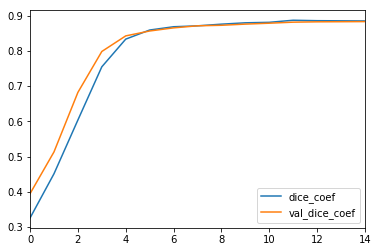

In [87]:
pd.DataFrame(history.history)[['dice_coef', 'val_dice_coef']].plot()


Text(0.5, 1.0, 'y_pred')

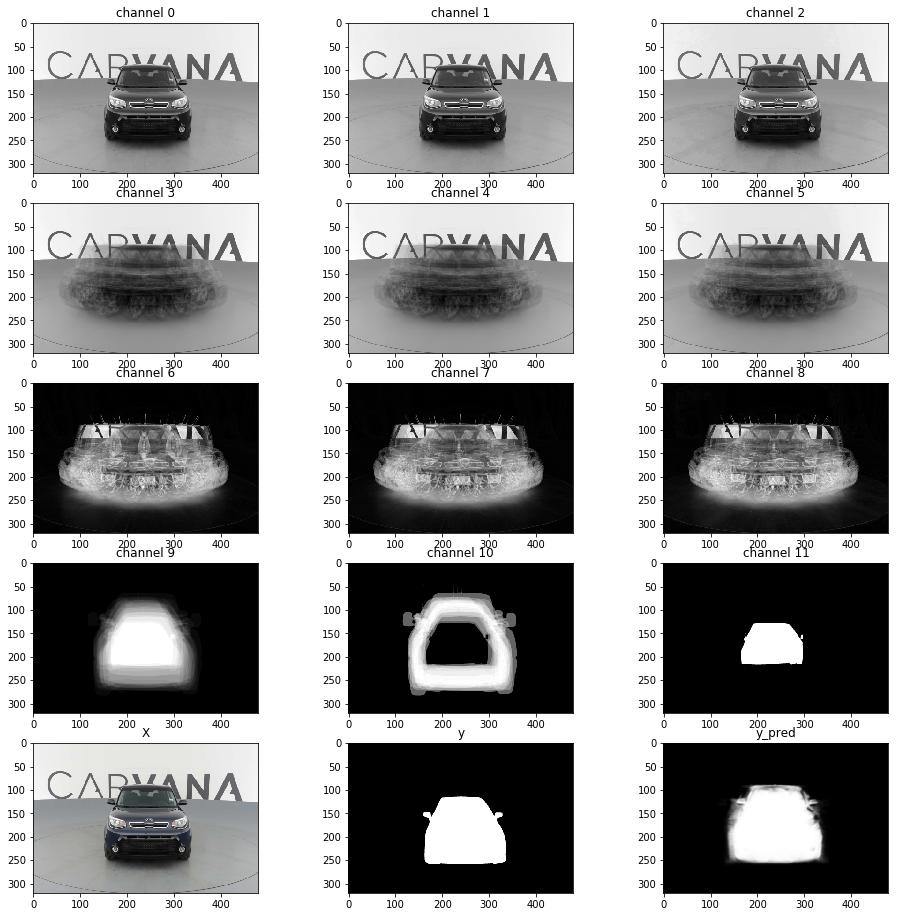

In [23]:
idx = 0
x = X_val[idx]

fig, ax = plt.subplots(5,3, figsize=(16, 16))
ax = ax.ravel()

cmaps = ['Reds', 'Greens', 'Blues']
for i in range(x.shape[-1]):
    ax[i].imshow(x[...,i], cmap='gray') #cmaps[i%3])
    ax[i].set_title('channel {}'.format(i))

ax[-3].imshow((x[...,:3] * X_std[0,...,:3] + X_mean[0,...,:3]) / 255.)
ax[-3].set_title('X')

ax[-2].imshow(y_train[idx,...,0], cmap='gray')
ax[-2].set_title('y')

y_pred = model.predict(x[None]).squeeze()
ax[-1].imshow(y_pred, cmap='gray')
ax[-1].set_title('y_pred')

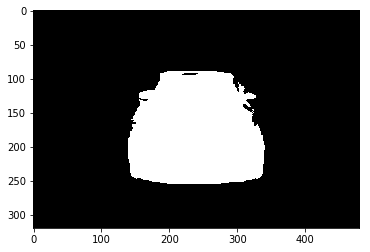

In [24]:
plt.imshow(y_pred > 0.5, cmap='gray')